In [2]:
import tensorflow as tf


In [3]:
print(tf.__version__)


1.15.0


In [0]:
import pandas as pd
import numpy as np


In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/Tensorflow_classification/master/diabetes.csv')

In [6]:
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
skin_thickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')
outcome = tf.feature_column.numeric_column('Outcome')

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [0]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

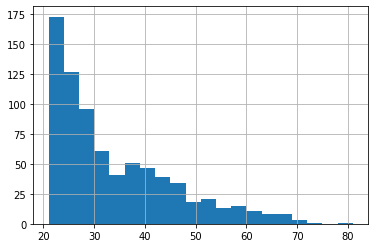

In [33]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, skin_thickness, insulin, bmi, diabetes_pedigree, age]

In [0]:
#TRAIN TEST SPLIT

In [0]:
x_data = diabetes.drop('Outcome', axis=1)

In [48]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [0]:
labels = diabetes['Outcome']

In [50]:
labels

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [54]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpcgn1w0oa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f34861816a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpcgn1w0oa/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 329.312
INFO:tensorflow:loss = 5.7140145, step = 101 (0.317 sec)
INFO:tensorflow:global_step/sec: 415.525
INFO:tensorflow:loss = 4.5304294, step = 201 (0.235 sec)
INFO:tensorflow:global_step/sec: 433.709
INFO:tensorflow:loss = 3.595522, step = 301 (0.233 sec)
INFO:tensorflow:global_step/sec: 470.529
INFO:tensorflow:loss = 6.2411065, step = 401 (0.209 sec)
INFO:tensorflow:global_step/

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [57]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-13T10:28:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcgn1w0oa/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-13-10:28:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6753247, accuracy_baseline = 0.64935064, auc = 0.6723045, auc_precision_recall = 0.5403549, average_loss = 0.633704, global_step = 1000, label/mean = 0.35064936, loss = 6.099401, precision = 0.6, prediction/mean = 0.27334642, recall = 0.22222222
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpcgn1w0oa/model.ckpt-1000


In [58]:
results

{'accuracy': 0.6753247,
 'accuracy_baseline': 0.64935064,
 'auc': 0.6723045,
 'auc_precision_recall': 0.5403549,
 'average_loss': 0.633704,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 6.099401,
 'precision': 0.6,
 'prediction/mean': 0.27334642,
 'recall': 0.22222222}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)


In [63]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcgn1w0oa/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
my_pred

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.27232283], dtype=float32),
  'logits': array([-0.98286915], dtype=float32),
  'probabilities': array([0.7276771 , 0.27232283], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33646148], dtype=float32),
  'logits': array([-0.6791033], dtype=float32),
  'probabilities': array([0.6635385 , 0.33646145], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.15685102], dtype=float32),
  'logits': array([-1.6818471], dtype=float32),
  'probabilities': array([0.84314895, 0.15685104], dtype=float32)

In [66]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjis1en8v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3485ee9940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [67]:
dnn_model.train(input_fn = input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpjis1en8v/model.ckpt.
INFO:tensorflow:loss = 100.32457, step = 1
INFO:tensorflow:global_step/sec: 335.625
INFO:tensorflow:loss = 5.6749287, step = 101 (0.303 sec)
INFO:tensorflow:global_step/sec: 398.468
INFO:tensorflow:loss = 4.809929, step = 201 (0.255 sec)
INFO:tensorflow:global_step/sec: 383.601
INFO:tensorflow:loss = 5.5926695, step = 301 (0.257 sec)
INFO:tensorflow:global_step/sec: 398.345
INFO:tensorflow:loss = 5.524739, step = 401 (0.251 sec)
INFO:tensorflow:global_step/sec: 385.657
INFO:tensorflow:loss = 8.683924, step = 501 (0.258 sec)
INFO:tensorflow:global_step/sec: 478.409

In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, skin_thickness, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [75]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpp6xh12o9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f34843bc5c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [76]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: ignored

In [77]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10)

ValueError: ignored

In [0]:
##deprecated code update required 